In [1]:
# Notebook to find the "volume capture metric" with respect to FDR confidence map

from genericpath import isfile
import os
import sys
import shutil
import subprocess
import numpy as np
from datetime import datetime
from joblib import Parallel, delayed




EMDB_PDB_ids_training = ["0026_6gl7", "7573_6crv",  "0665_6oa9", "0038_6gml", "0071_6gve", "0093_6gyn", "0094_6gyo", "0132_6h3c", "0234_6hjn", "0408_6nbd", "0415_6nbq", "4288_6fo2", "0452_6nmi", "0490_6nr8", "0492_6nra", "0567_6o0h", "0589_6nmi", "0592_6o1m", "0776_6ku9", "10049_6rx4", "10069_6s01", "10100_6s5t", "10105_6s6t", "10106_6s6u", "10273_6sof", "10279_6sp2", "10324_6swe", "10333_6swy", "10418_6t9n", "10534_6tni", "10585_6ttu", "10595_6tut", "10617_6xt9", "20145_6oo4", "20146_6oo5", "20189_6osy", "20234_6p19", "20249_6p4h", "20254_6p5a", "20259_6p62", "20270_6p7v", "20271_6p7w", "20352_6pik", "20521_6pxm", "20986_6v0b", "21012_6v1i", "21107_6v8o", "21144_6vbu", "21391_6vv5", "3661_5no2", "3662_5no3", "3802_5of4", "3885_6el1", "3908_6eoj", "4032_5lc5", "4073_5lmn", "4074_5lmo", "4079_5lmt", "4148_5m3m", "4162_6ezo", "4192_6f6w", "4214_6fai", "4241_6fe8", "4272_6fki", "4401_6i2x", "4404_6i3m", "4429_6i84", "4588_6qm5", "4589_6qm6", "4593_6qma", "4728_6r5k", "4746_6r7x", "4759_6r8f", "4888_6ric", "4889_6rid", "4890_6rie", "4907_6rkd", "4917_6rla", "4918_6rlb", "4941_6rn3", "4983_6rqj", "7009_6ave", "7041_6b3q", "7065_6b7y", "7090_6bf6", "7334_6c23", "7335_6c24", "8911_6dt0", "8958_6e1n", "8960_6e1p", "9258_6muw", "9259_6mux", "9931_6k7g", "9934_6k7i", "9935_6k7j", "9939_6k7l", "9941_6k7m", "9695_6iok"]
EMDB_PDB_ids_validation = ["0193_6hcg", "0257_6hra", "0264_6hs7", "0499_6nsk", "10401_6t8h", "20449_6pqo", "20849_6uqk", "4611_6qp6", "4646_6qvb", "4733_6r69", "4789_6rb9", "7133_6bqv", "7882_6dg7", "8069_5i08", "9112_6mgv", "9298_6mzc", "9374_6nhv"]
EMDB_PDB_ids_epsilon = ["0282_6huo", "0311_6hz5", "0560_6nzu", "10365_6t23", "20220_6oxl", "20226_6p07", "3545_5mqf", "4141_5m1s", "4531_6qdw", "4571_6qk7", "4997_6rtc", "7127_6bpq",  "8702_5vkq", "9610_6adq"]
EMDB_PDB_ids_all = EMDB_PDB_ids_training + EMDB_PDB_ids_validation + EMDB_PDB_ids_epsilon

res_dict = {"0026" : 6.3, "0038" : 3.2, "0071" : 3.9, "0093" : 3.4, "0094" : 3.4, "0132" : 3.9, "0234" : 3.3, "0408" : 3.2, "0415" : 3.1, "4288" : 4.4, "0452" : 3.7, "0490" : 7.8, "0492" : 7.7, "0567" : 3.67, "0589" : 3.9, "0592" : 3.15, "0665" : 3.9, "0776" : 2.67, "10049" : 3.3, "10069" : 3.2, "10100" : 4.15, "10105" : 4.1, "10106" : 3.5, "10273" : 4.3, "10279" : 3.33, "10324" : 3.1, "10333" : 3.2, "10418" : 2.96, "10534" : 3.4, "10585" : 3.7, "10595" : 3.25, "10617" : 3.8, "20145" : 3.3, "20146" : 4.2, "20189" : 4.3, "20234" : 3.8, "20249" : 3.2, "20254" : 3.6, "20259" : 3.57, "20270" : 4, "20271" : 4.1, "20352" : 7.8, "20521" : 2.1, "20986" : 4.1, "21012" : 3.8, "21107" : 3.07, "21144" : 3.1, "21391" : 3.5, "3661" : 5.16, "3662" : 5.16, "3802" : 4.4, "3885" : 6.1, "3908" : 3.55, "4032" : 4.35, "4073" : 3.55, "4074" : 4.3, "4079" : 4.15, "4148" : 4, "4162" : 4.1, "4192" : 3.81, "4214" : 3.4, "4241" : 4.1, "4272" : 4.3, "4401" : 3.35, "4404" : 3.93, "4429" : 4.4, "4588" : 3.6, "4589" : 3.7, "4593" : 3.7, "4728" : 4.8, "4746" : 3.47, "4759" : 3.8, "4888" : 2.8, "4889" : 2.9, "4890" : 3.1, "4907" : 3.2, "4917" : 3.9, "4918" : 4.5, "4941" : 4, "4983" : 3.5, "7009" : 3.7, "7041" : 3.7, "7065" : 6.5, "7090" : 6.5, "7334" : 3.9, "7335" : 3.5, "8911" : 3.7, "8958" : 3.7, "8960" : 3.7, "9258" : 3.6, "9259" : 3.9, "9931" : 3.3, "9934" : 3.22, "9935" : 3.08, "9939" : 2.83, "9941" : 2.95, "9695" : 3.64, "0193" : 4.3, "0257" : 3.7, "0264" : 4.6, "0499" : 2.7, "10401" : 3.77, "20449" : 2.88, "20849" : 3.77, "4611" : 3.2, "4646" : 4.34, "4733" : 3.65, "4789" : 3.2, "7133" : 3.1, "7882" : 3.32, "8069" : 4.04, "9112" : 3.1, "9298" : 4.5, "9374" : 3.5, "0282" : 3.26, "0311" : 4.2, "0560" : 3.2, "10365" : 3.1, "20220" : 3.5, "20226" : 3.2, "3545" : 5.9, "4141" : 6.7, "4531" : 2.83, "4571" : 3.3, "4997" : 3.96, "7127" : 4.1, "7573" : 3.2, "8702" : 3.55, "9610" : 3.5}

symmetry_dictionary = {'0026': 'C2', '0038': 'C1', '0071': 'D2', '0093': 'C4', '0094': 'C4', '0132': 'C2', '0234': 'C3', '0408': 'C2', '0415': 'C1', '4288': 'C2', '0452': 'C1', '0490': 'C1', '0492': 'C1', '0567': 'D2', '0589': 'C1', '0592': 'C2', '0665': 'C1', '0776': 'C3', '10049': 'C1', '10069': 'C1', '10100': 'C1', '10105': 'C1', '10106': 'C2', '10273': 'C1', '10279': 'C6', '10324': 'C1', '10333': 'C1', '10418': 'C4', '10534': 'C1', '10585': 'C1', '10595': 'C1', '10617': 'C1', '20145': 'C2', '20146': 'C2', '20189': 'C3', '20234': 'C1', '20249': 'C1', '20254': 'C2', '20259': 'C3', '20270': 'C1', '20271': 'C1', '20352': 'C2', '20521': 'O', '20986': 'C5', '21012': 'C9', '21107': 'C1', '21144': 'C1', '21391': 'C3', '3661': 'C1', '3662': 'C1', '3802': 'C1', '3885': 'C10', '3908': 'C1', '4032': 'C1', '4073': 'C1', '4074': 'C1', '4079': 'C1', '4148': 'C1', '4162': 'C2', '4192': 'C1', '4214': 'C1', '4241': 'C1', '4272': 'C1', '4401': 'C1', '4404': 'C2', '4429': 'C1', '4588': 'C2', '4589': 'C2', '4593': 'C2', '4728': 'C1', '4746': 'C2', '4759': 'C1', '4888': 'C1', '4889': 'C1', '4890': 'C1', '4907': 'D3', '4917': 'C2', '4918': 'C1', '4941': 'C1', '4983': 'C1', '7009': 'C3', '7041': 'C1', '7065': 'C1', '7090': 'C2', '7334': 'C1', '7335': 'C1', '8911': 'C2', '8958': 'C2', '8960': 'C2', '9258': 'C2', '9259': 'C1', '9931': 'C1', '9934': 'C1', '9935': 'C1', '9939': 'C1', '9941': 'C1', '9695': 'C1', '0193': 'C15', '0257': 'C1', '0264': 'C5', '0499': 'C6', '10401': 'C1', '20449': 'C4', '20849': 'C4', '4611': 'C2', '4646': 'C2', '4733': 'C1', '4789': 'C7', '7133': 'C4', '7882': 'C5', '8069': 'C3', '9112': 'C2', '9298': 'C1', '9374': 'C1', '0282': 'C1', '0311': 'C2', '0560': 'C2', '10365': 'C1', '20220': 'C1', '20226': 'C1', '3545': 'C1', '4141': 'C1', '4531': 'C1', '4571': 'C1', '4997': 'C2', '7127': 'C4', '7573': 'C3', '8702': 'C4', '9610': 'C2'}


In [2]:

def get_input_files(emdb_pdb, dataset_type):
    
    if dataset_type == "MB":
        suffix = "_epsilon_MB"
    elif dataset_type == "MF":
        suffix = "_epsilon_MF"
    elif dataset_type == "hybrid":
        suffix = "_epsilon_MBI"
    else:
        suffix = ""
        data_folder_alpha = "/home/abharadwaj1/shortcuts/locscale_mapdata/collection_dataset_3"
    data_folder_epsilon = "/home/abharadwaj1/shortcuts/locscale_mapdata/dataset_attempt{}".format(suffix)
    emdb_pdb_path = os.path.join(data_folder_epsilon, emdb_pdb)
    emdb, pdb = emdb_pdb.split("_")
    try:
        symmetry = symmetry_dictionary[emdb]
    except KeyError:
        print("No symmetry information for {}".format(emdb))
        print(emdb_pdb)
        raise KeyError

    folder_containing_files = os.path.join(emdb_pdb_path)
    folder_containing_phenix_and_deposited_maps = f"/home/abharadwaj1/papers/elife_paper/figure_information/outputs/figure_3/qscores/{emdb_pdb}/"
    phenix_sharpened_map_path_1 = os.path.join(folder_containing_phenix_and_deposited_maps, "emd_{}_phenix_sharpened.map".format(emdb))
    phenix_sharpened_map_path_2 = os.path.join(folder_containing_phenix_and_deposited_maps, "emd_{}_Phenix.map".format(emdb))
    
    if os.path.exists(phenix_sharpened_map_path_1):
        phenix_sharpened_map_path = phenix_sharpened_map_path_1
    elif os.path.exists(phenix_sharpened_map_path_2):
        phenix_sharpened_map_path = phenix_sharpened_map_path_2
    else:
        phenix_sharpened_map_path = "none"

    #deposited_map = f"/tudelft/abharadwaj1/staff-umbrella/ajlab/students/MEP/2021/RB/mapdata/{emdb_pdb}/EMDBmaps/sharpened_maps/emd_{emdb}_deposited.map"
    deposited_map = os.path.join(folder_containing_phenix_and_deposited_maps, "emd_{}_deposited.map".format(emdb))

    model_based_locscale_file = os.path.join(folder_containing_files, "emd_{}_model_based_locscale{}.mrc".format(emdb, suffix))
    model_free_locscale_file = os.path.join(folder_containing_files, "emd_{}_model_free_locscale{}.mrc".format(emdb, suffix))
    model_based_integrated_locscale_file = os.path.join(folder_containing_files, "emd_{}_model_based_integrated_locscale{}.mrc".format(emdb, suffix))

    MB_processing_file = os.path.join(folder_containing_files, "emd_{}_MB_locscale_processing_files{}".format(emdb, suffix))
    refined_pdb_path = os.path.join(MB_processing_file, "PDB_{}_unrefined_shifted_servalcat_refined.pdb".format(pdb))
    refined_shifted_pdb_path = os.path.join(MB_processing_file, "PDB_{}_unrefined_shifted_servalcat_refined_shifted_bfactors.pdb".format(pdb))
    refined_model_map_path = os.path.join(MB_processing_file, "PDB_{}_unrefined_shifted_servalcat_refined_shifted_bfactors_4locscale.mrc".format(pdb))


    MF_processing_file = os.path.join(folder_containing_files, "emd_{}_MF_locscale_processing_files{}".format(emdb, suffix))
    refined_pseudomodel_path = os.path.join(MF_processing_file, "emd_{}_FDR_confidence_final_gradient_pseudomodel_proper_element_composition.pdb".format(emdb))
    refined_shifted_pseudomodel_path = os.path.join(MF_processing_file, "emd_{}_FDR_confidence_final_gradient_pseudomodel_proper_element_composition_shifted_bfactors.pdb".format(emdb))
    
    if symmetry == "C1":
        refined_pseudo_model_map_path = os.path.join(MF_processing_file, "emd_{}_FDR_confidence_final_gradient_pseudomodel_proper_element_composition_shifted_bfactors_4locscale.mrc".format(emdb))
    else:
        refined_pseudo_model_map_path = os.path.join(MF_processing_file, "emd_{}_FDR_confidence_final_gradient_pseudomodel_proper_element_composition_shifted_bfactors_4locscale_{}_symmetry.mrc".format(emdb, symmetry))
    
    MB_integrated_processing_file = os.path.join(folder_containing_files, "emd_{}_MB_integrated_locscale_processing_files{}".format(emdb, suffix))
    refined_integrated_pdb_path = os.path.join(MB_integrated_processing_file, "PDB_{}_unrefined_shifted_integrated_pseudoatoms_proper_element_composition.pdb".format(pdb))
    refined_integrated_shifted_pdb_path = os.path.join(MB_integrated_processing_file, "PDB_{}_unrefined_shifted_integrated_pseudoatoms_proper_element_composition_shifted_bfactors.pdb".format(pdb))
    if symmetry == "C1":
        refined_integrated_model_map_path = os.path.join(MB_integrated_processing_file, "PDB_{}_unrefined_shifted_integrated_pseudoatoms_proper_element_composition_shifted_bfactors_4locscale.mrc".format(pdb))
    else:
        refined_integrated_model_map_path = os.path.join(MB_integrated_processing_file, "PDB_{}_unrefined_shifted_integrated_pseudoatoms_proper_element_composition_shifted_bfactors_4locscale_{}_symmetry.mrc".format(pdb, symmetry))
    
    if dataset_type == "MB":
        target_processing_file = MB_processing_file
        target_pdb_path = refined_pdb_path
        target_shifted_pdb_path = refined_shifted_pdb_path
        target_model_map_path = refined_model_map_path
        target_sharpened_file = model_based_locscale_file
    elif dataset_type == "MF":
        target_processing_file = MF_processing_file
        target_pdb_path = refined_pseudomodel_path
        target_shifted_pdb_path = refined_shifted_pseudomodel_path
        target_model_map_path = refined_pseudo_model_map_path
        target_sharpened_file = model_free_locscale_file
    elif dataset_type == "hybrid":
        target_processing_file = MB_integrated_processing_file
        target_pdb_path = refined_integrated_pdb_path
        target_shifted_pdb_path = refined_integrated_shifted_pdb_path
        target_model_map_path = refined_integrated_model_map_path
        target_sharpened_file = model_based_integrated_locscale_file
        


    unsharpened_map_file = os.path.join(target_processing_file, "EMD_{}_unsharpened_fullmap.mrc".format(int(emdb)))
    halfmap_1_file = os.path.join(target_processing_file, "emd_{}_half_map_1.map".format(emdb))
    halfmap_2_file = os.path.join(target_processing_file, "emd_{}_half_map_2.map".format(emdb))
    globally_sharpened_map_file = os.path.join(target_processing_file, "EMD_{}_unsharpened_fullmap_global_sharpened_filtered.mrc".format(int(emdb)))
    mask_file = os.path.join(target_processing_file, "emd_{}_FDR_confidence_final.map".format(emdb))
        
    input_files_emdb = {
        "model_based_locscale_file": model_based_locscale_file,
        "model_free_locscale_file": model_free_locscale_file,
        "model_based_integrated_locscale_file": model_based_integrated_locscale_file,
        "refined_pdb_path": refined_pdb_path,
        "refined_shifted_pdb_path": refined_shifted_pdb_path,
        "refined_pseudomodel_path": refined_pseudomodel_path,
        "refined_integrated_pdb_path": refined_integrated_pdb_path,
        "unsharpened_map_file": unsharpened_map_file,
        "globally_sharpened_map_file": globally_sharpened_map_file,
        "mask_file": mask_file,
        "halfmap_1_file": halfmap_1_file,
        "halfmap_2_file": halfmap_2_file,
        "refined_model_map_path": refined_model_map_path,
        "refined_pseudo_model_map_path": refined_pseudo_model_map_path,
        "refined_integrated_model_map_path": refined_integrated_model_map_path,
        "target_processing_file": target_processing_file,
        "target_pdb_path": target_pdb_path,
        "target_shifted_pdb_path": target_shifted_pdb_path,
        "target_model_map_path": target_model_map_path,
        "target_sharpened_file": target_sharpened_file,
        "phenix_sharpened_map_path": phenix_sharpened_map_path,
        "deposited_map_path": deposited_map,
    }

    # Check if all input files exist and if not then change the value of the dictionary to None
    for key, value in input_files_emdb.items():
        if not os.path.exists(value):
            input_files_emdb[key] = None
    return input_files_emdb

In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

pr_scores_with_threshold_folder = "/home/abharadwaj1/papers/elife_paper/figure_information/scripts/rscc_scores_thresholds/"
pr_scores_dict = {}

for file in os.listdir(pr_scores_with_threshold_folder):
    if file.endswith(".pickle"):
        if not file.startswith("rscc"):
            emdb_id = file.split("_")[4]
            pr_scores_dict[emdb_id] = pd.read_pickle(os.path.join(pr_scores_with_threshold_folder, file))
        


In [4]:
pr_scores_dict['0026']['precision'].keys()

dict_keys(['unsharpened', 'deposited', 'model_based', 'model_free', 'hybrid', 'phenix_sharpened'])

In [5]:
unsharpened_precision = []
unsharpened_recall = []
deposited_precision = []
deposited_recall = []
model_based_precision = []
model_based_recall = []
model_free_precision = []
model_free_recall = []
model_based_integrated_precision = []
model_based_integrated_recall = []
phenix_precision = []
phenix_recall = []

for emdb_id in pr_scores_dict.keys():
    pr_scores = pr_scores_dict[emdb_id]
    try:
        unsharpened_precision.append(pr_scores['precision']['unsharpened'])
        unsharpened_recall.append(pr_scores['recall']['unsharpened'])
        deposited_precision.append(pr_scores['precision']['deposited'])
        deposited_recall.append(pr_scores['recall']['deposited'])
        model_based_precision.append(pr_scores['precision']['model_based'])
        model_based_recall.append(pr_scores['recall']['model_based'])
        model_free_precision.append(pr_scores['precision']['model_free'])
        model_free_recall.append(pr_scores['recall']['model_free'])
        model_based_integrated_precision.append(pr_scores['precision']['hybrid'])
        model_based_integrated_recall.append(pr_scores['recall']['hybrid'])
        phenix_precision.append(pr_scores['precision']['phenix_sharpened'])
        phenix_recall.append(pr_scores['recall']['phenix_sharpened'])
    except:
        print(emdb_id, pr_scores.keys())

In [6]:
pr_scores_dict.keys()

dict_keys(['0026', '7573', '0665', '0038', '0071', '0093', '0094', '0132', '0234', '0408', '0415', '4288', '0452', '0490', '0492', '0589', '0592', '0776', '10049', '10069', '10100', '10106', '10273', '10279', '10324', '10418', '10534', '10585', '10595', '10617', '20145', '20146', '20234', '20249', '20254', '20259', '20270', '20271', '20521', '20986', '21012', '21107', '21144', '21391', '3661', '3662', '3802', '3908', '4032', '4073', '4074', '4079', '4148', '4162', '4192', '4241', '4401', '4588', '4746', '4759', '4888', '4889', '4890', '4917', '4918', '4941', '4983', '7009', '7041', '7065', '7090', '7334', '7335', '8958', '8960', '9258', '9259', '9931', '9934', '9935', '9939', '9941', '0257', '0499', '10401', '4611', '4646', '4733', '4789', '9374', '0282', '0311', '10365', '20220', '20226', '4571', '4997', '7127', '8702', '9610'])

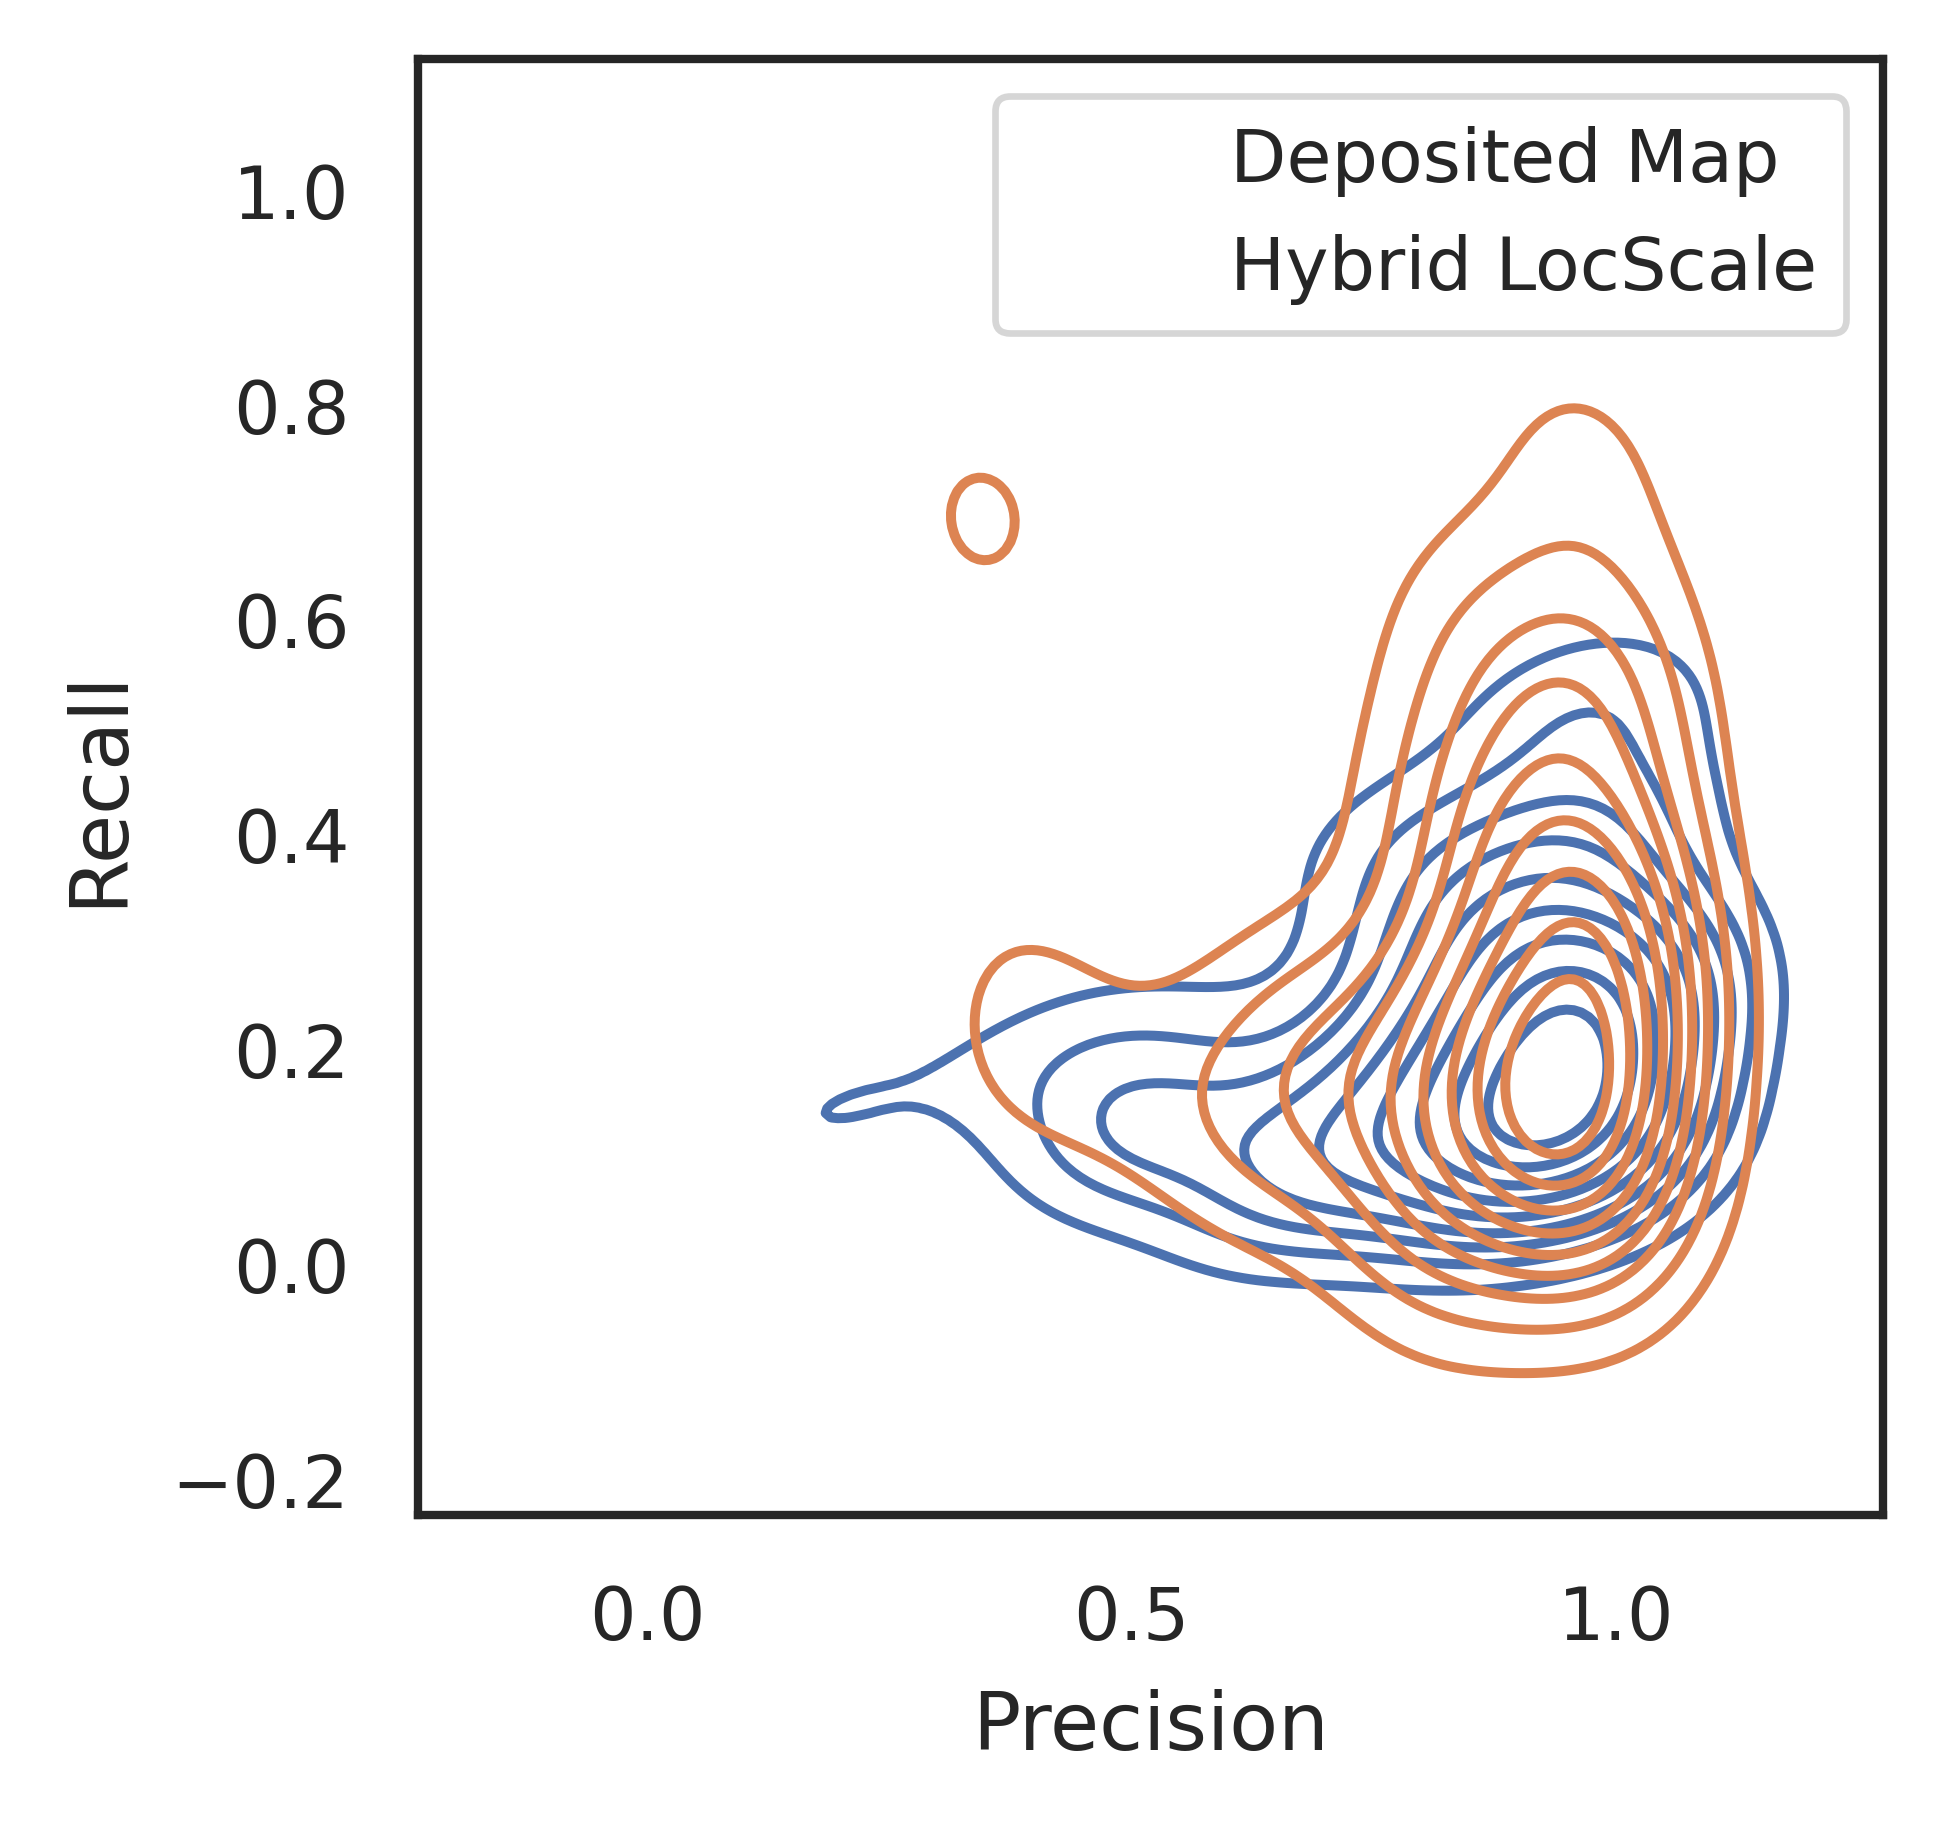

In [12]:
import matplotlib
import matplotlib.pyplot as plt
fontsize=6
figsize_cm = [8,8]
font = "Helvetica"
fontscale = 1.0    
## Headers
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# set the global font size for the plot

    
plt.rcParams.update({'font.size': fontsize})
figsize = (figsize_cm[0]/2.54, figsize_cm[1]/2.54) # convert cm to inches

fig, ax1 = plt.subplots(figsize=figsize, dpi=600)  # DPI is fixed to 600 for publication quality
sns.set_theme(context="paper", font=font, font_scale=fontscale)
# Set font size for all text in the figure
sns.set_style("white")

## Plot the data

sns.kdeplot(x=deposited_precision, y=deposited_recall, fill=False, thresh=0.1, ax=ax1, label="Deposited Map")
sns.kdeplot(x=model_based_integrated_precision, y=model_based_integrated_recall, fill=False, thresh=0.1, ax=ax1, label="Hybrid LocScale")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend()
plt.savefig("precision_recall.png", bbox_inches='tight')


In [43]:
from scipy.stats import hmean as harmonic_mean
f1_score_unsharpened = []
f1_score_deposited = []
f1_score_model_based = []
f1_score_model_free = []
f1_score_model_based_integrated = []
f1_score_phenix = []

for emdb_id in pr_scores_dict.keys():
    pr_scores = pr_scores_dict[emdb_id]
    try:
        precision_scores_unsharpened = pr_scores['precision']['unsharpened']
        recall_scores_unsharpened = pr_scores['recall']['unsharpened']
        precision_scores_deposited = pr_scores['precision']['deposited']
        recall_scores_deposited = pr_scores['recall']['deposited']
        precision_scores_model_based = pr_scores['precision']['model_based']
        recall_scores_model_based = pr_scores['recall']['model_based']
        precision_scores_model_free = pr_scores['precision']['model_free']
        recall_scores_model_free = pr_scores['recall']['model_free']
        precision_scores_model_based_integrated = pr_scores['precision']['hybrid']
        recall_scores_model_based_integrated = pr_scores['recall']['hybrid']
        precision_scores_phenix = pr_scores['precision']['phenix_sharpened']
        recall_scores_phenix = pr_scores['recall']['phenix_sharpened']

        f1_score_unsharpened.append(harmonic_mean([precision_scores_unsharpened, recall_scores_unsharpened]))
        f1_score_deposited.append(harmonic_mean([precision_scores_deposited, recall_scores_deposited]))
        f1_score_model_based.append(harmonic_mean([precision_scores_model_based, recall_scores_model_based]))
        f1_score_model_free.append(harmonic_mean([precision_scores_model_free, recall_scores_model_free]))
        f1_score_model_based_integrated.append(harmonic_mean([precision_scores_model_based_integrated, recall_scores_model_based_integrated]))
        f1_score_phenix.append(harmonic_mean([precision_scores_phenix, recall_scores_phenix]))
    except:
        print(emdb_id, pr_scores.keys())


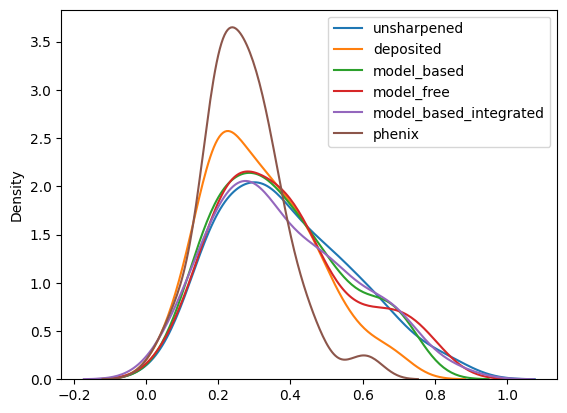

In [47]:
import matplotlib.pyplot as plt
# plot the f1 score for all the methods as kde plots
sns.kdeplot(x=f1_score_unsharpened, fill=False, thresh=0.1)
sns.kdeplot(x=f1_score_deposited, fill=False, thresh=0.1)
sns.kdeplot(x=f1_score_model_based, fill=False, thresh=0.1)
sns.kdeplot(x=f1_score_model_free, fill=False, thresh=0.1)
sns.kdeplot(x=f1_score_model_based_integrated, fill=False, thresh=0.1)
sns.kdeplot(x=f1_score_phenix, fill=False, thresh=0.1)
plt.legend(['unsharpened', 'deposited', 'model_based', 'model_free', 'model_based_integrated', 'phenix'])

In [77]:
def pretty_boxplots1(list_of_series, xticks, ylabel,xlabel=None, figsize_cm=(14,8),\
                    fontscale=3,font="Helvetica",linewidth=2, title=None, fontsize=10):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import cm
    import matplotlib
    
    ## Headers
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    # set the global font size for the plot

        
    plt.rcParams.update({'font.size': fontsize})
    figsize = (figsize_cm[0]/2.54, figsize_cm[1]/2.54) # convert cm to inches
    
    fig, ax1 = plt.subplots(figsize=figsize, dpi=600)  # DPI is fixed to 600 for publication quality
    sns.set_theme(context="paper", font=font, font_scale=fontscale)
    # Set font size for all text in the figure
    sns.set_style("white")

    ## Plot the data


    ax1.violinplot(list_of_series, showmedians=True)
    ax1.set_xticklabels(xticks)
    # set xtick labels rotation
    plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    ax1.set_ylabel(ylabel)
    if title is not None:
        ax1.set_title(title)
    if xlabel is not None:
        ax1.set_xlabel(xlabel)
    fig.tight_layout()
    
    return fig

/tmp/ipykernel_735/3166960481.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xticks)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


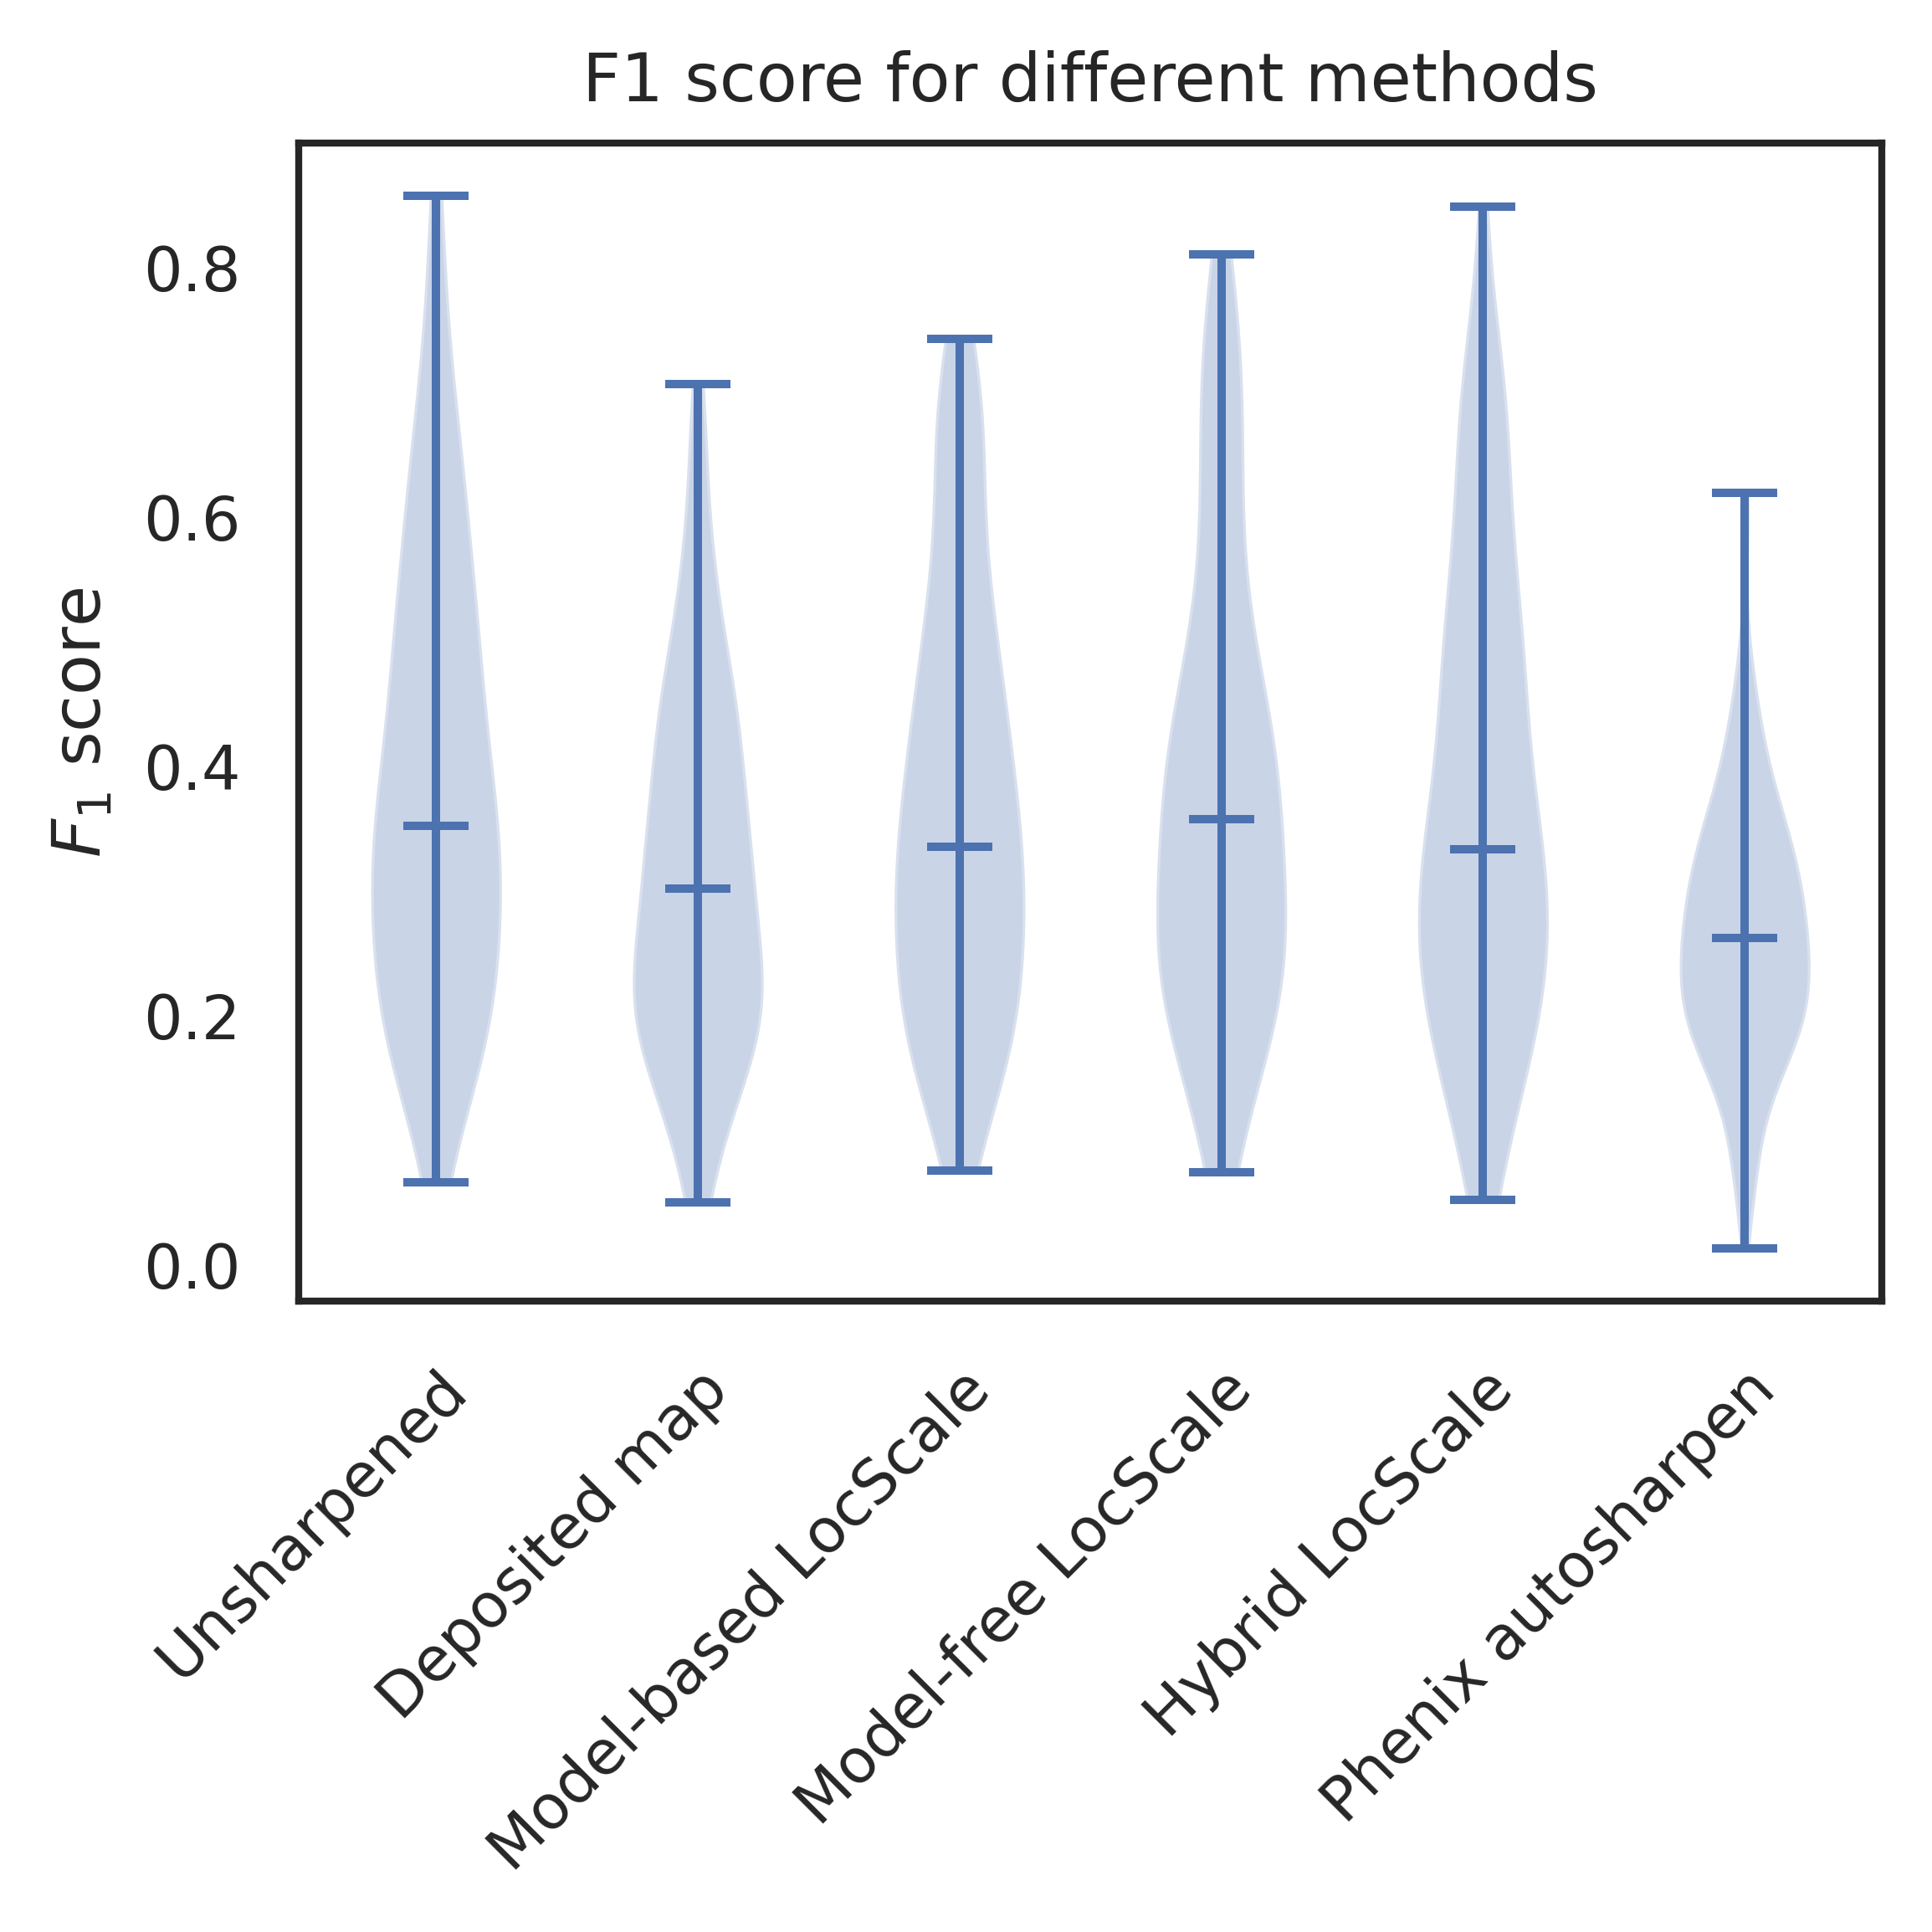

In [78]:
list_of_lists = [f1_score_unsharpened, f1_score_deposited, f1_score_model_based, f1_score_model_free, f1_score_model_based_integrated, f1_score_phenix]
series_labels = ['Unsharpened','Unsharpened', 'Deposited map', 'Model-based LocScale', 'Model-free LocScale', 'Hybrid LocScale', 'Phenix autosharpen']
fig = pretty_boxplots1(
    list_of_lists,
    xticks=series_labels,
    ylabel='$F_1$ score',
    title='F1 score for different methods',
    figsize_cm=(10, 10),
    fontscale=1,
)

fig.savefig('f1_score_boxplot.eps')